# Objetivo da tarefa

O objetivo deste notebook é descrever as estratégias tomadas para o desafio de análise de textos e atribuição de valores de valência a sentenças. Foram oferecidos dois desafios: Determinação de Valência em Manchetes de Jornais Brasileiros e Determinação de Rótulos de Emoção com base nos dados oferecidos no SemEval 2007 - 4th International Workshop on Semantic Evaluations, Task 14, Affective Tests.

O problema escolhido foi o de Determinação de Valência em manchetes de Jornais Brasileiros, para tal, foi oferecida uma base de manchetes de jornais como "Valor Econômico", "O Globo", "Folha de São Paulo" e o "Estado de São Paulo", extraídas em datas específicas entre os meses de Dezembro de 2016 à agosto de 2017. [1]

O problema consistia em classificar as manchetes em valência positiva, neutra ou negativa. A tarefa consistia em definir uma abordagem ao problema, elaborar um modelo de classificação, definir as regras de análise e realizar a implementação prática do algoritmo definido.

[1. Base de manchetes](https://github.com/pdpcosta/manchetesBrasildatabase)

# Escolha das Ferramentas

A tarefa deixava livre a escolha das ferramentas ou linguagens de programação para a execução, implementação e validação dos algoritmos que tinham o objetivo de realizar a Análise de Sentimentos nas manchetes. Levando em consideração a facilidade da utilização da linguagem de programação Python para realizar atividades de Processamento de línguagem natural e a grande quantidade de ferramentas e bibliotecas disponível, assim como a grande quantidade de referêncial bibliográfico disponível na internet optei pela utilização da mesma.

Escolhi a utilização da biblioteca Pandas para facilitar a leitura dos arquivos em estruturas de dados e pelas funções que a mesma fornece em sua extensa lista de ferramentas. Outras ferramentas necessárias para a Análise de Sentimentos serão descritas no decorrer deste notebook.

# Instalação de dependências

A primeira coisa que devemos fazer durante a execução deste notebook é instalar as dependências necessárias para que o projeto funcione. Um modo de fazer isso automáticamente por meio do Jupyter Notebook é realizar a instalação durante a execução das células. A maneira que temos para realizar isso é importar o módulo sys do Python e solicitar para que o sistema operacional instale os pacotes necessários por meio do gerenciador de pacotes do Python chamado "pip".

A primeira dependência que iremos instalar é o Pandas para realizar as operações nas estruturas de dados fornecidas pelos arquivos de treinamento/teste.

**É importante que o Python e as suas configurações de váriaveis de ambiente estejam configuradas para que não ocorram problemas durante este processo.**

In [2]:
import sys
import pandas #tenho a impressão que não seria necessário instalar
!{sys.executable} -m pip install pandas

# Primeiras barreiras e Estratégias de Resolução

Ao realizar uma análise básica da base de dados fornecida para a tarefa foi observado que a mesma não fornece a classificação das manchetes com os rótulos (Positivo, Neutro, Negativo), desta meneira não era possível utilizar a mesma como base de treinamento e teste para a classificação das mesmas.

Ao realizar uma busca na internet sobre bases rotuladas de manchetes na língua portuguesa não foram encontrados resultados aplicáveis ao problema em questão, entretanto, durante as pesquisas foi observado que uma das atividades mais recorrentes em Análise de Sentimentos na língua portuguesa era a análise de Tweets, dada as semelhanças entre os Tweets e Manchetes (tamanho reduzido da sentença, temas recorrentes como política e etc), optei pela utilização da base fornecida pelo escritor do artigo "Análise de Sentimentos - Aprenda de uma vez por todas como funciona utilizando dados do Twitter" [2] como conjunto de treinamento do modelo de classificação.

Neste mesmo artigo, o autor descreve o passo a passo necessário para realizar Análise de Sentimentos, optei por utilizar a mesma estratégia e ferramentas que o mesmo recomendou durante a Livestream [3] onde o autor descreve as principais atividades necessárias para realizar a análise de sentimento na base de Tweets.

[2. Base de Tweets Rotulada sobre política em Minas Gerais.](https://minerandodados.com.br/analise-de-sentimentos-twitter-como-fazer/)  
[3. Livestream - Análise de Sentimentos](https://www.youtube.com/watch?v=MV-X-a84BFs)


# Implementação - Importação dos dados e limpeza da base de treinamento

O primeiro passo necessário para realizar a Análise de Sentimento nos Tweets fornecidos pela base de treinamento é a leitura dos dados fornecidos por meio de um arquivo .CSV. Para tal utilizamos a funcionalidade de extração de dados fornecida pela bibliotecas Pandas para arquivos neste formanto, a função "read_csv()"[4] possibilita a configuração de diferentes parâmetros dada as características iniciais dos dados tais como o caractere de separação, tipo de codificação de texto, presença ou não de cabeçalhos e muitas outras possibilidades disponível na documentação da biblioteca.

Dado que base de dados oferecida para o treinamento tinha características padrões de arquivos CSV, não foi necessário realizar uma configuração profunda sobre os dados presentes e a auto configuração foi o suficiente para realizar a importação dos dados.

Optei por realizar uma validação rápiada para eliminar registros duplicados nos dados e utilizei a função head()[5] do objeto de DataFrame para visualizar se a extração dos dados foi realizada com sucesso, e aparentemente não houveram problemas ou ajustes necessários.

[4. Documentação Pandas read_csv().](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)  
[5. Documentação Pandas head().](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html)

In [0]:
import pandas as pd 

df = pd.read_csv('Tweets_Mg.csv', encoding='utf-8')
df.drop_duplicates(['Text'], inplace=True)
df.head(n=10)

,Unnamed: 0,Created At,Text,Geo Coordinates.latitude,Geo Coordinates.longitude,User Location,Username,User Screen Name,Retweet Count,Classificacao,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,0,Sun Jan 08 01:22:05 +0000 2017,���⛪ @ Catedral de Santo Antônio - Governador ...,NaN,NaN,Brasil,Leonardo C Schneider,LeoCSchneider,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Sun Jan 08 01:49:01 +0000 2017,"� @ Governador Valadares, Minas Gerais https:/...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Sun Jan 08 01:01:46 +0000 2017,"�� @ Governador Valadares, Minas Gerais https:...",-41.9333,-18.85,NaN,Wândell,klefnews,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Wed Jan 04 21:43:51 +0000 2017,��� https://t.co/BnDsO34qK0,NaN,NaN,NaN,Ana estudando,estudandoconcur,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Mon Jan 09 15:08:21 +0000 2017,��� PSOL vai questionar aumento de vereadores ...,NaN,NaN,NaN,Emily,Milly777,0,Negativo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,Sat Jan 07 13:47:55 +0000 2017,""" bom é bandido morto""\nDeputado Cabo Júlio é ...",NaN,NaN,Um Outro Mundo É Possível,Maristela Guimarães,florpimenta,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,Wed Jan 04 23:00:53 +0000 2017,"""..E 25% dos mineiros dizem não torcer para ti...",NaN,NaN,NaN,Adriano,almanakfc,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,Sun Jan 08 18:34:22 +0000 2017,"""A gigantesca barba do mal"" em destaque no cad...",NaN,NaN,"Belo Horizonte, Brasil",Editora Nemo,editoranemo,2,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,Wed Jan 04 22:55:08 +0000 2017,"""BB e governo de Minas travam disputa sobre de...",NaN,NaN,NaN,Minas Previ,MinasPrevi,0,Negativo,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,Sat Jan 07 01:37:10 +0000 2017,"""com vcs bh fica pequena!"" Belo Horizonte (pro...",NaN,NaN,Belo Horizonte - MG,Marina.,mmarinaey,0,Neutro,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Com o objetivo de verificar a quantidade de noticias positivas, neutras e negativas dentro do conjunto de dados podemos utilizar o método **value_counts()** do conjunto de DataFrame do Pandas.

In [0]:
df.Classificacao.value_counts()

Positivo    2840
Neutro      1974
Negativo     951
Name: Classificacao, dtype: int64

# Implementação - Pré-processamento dos dados

O próximo passo para realizar a Análise de Sentimento é o pré-processamento dos dados com o objetivo de realizar uma limpeza das características que não agregam valor a análise. A **imagem seguinte*** apresenta os passos necessários para realizar a análise de sentimento e em seguida serão descritas as funções de cada uma dessas etapas.

![Passos para a análise de sentimento.](https://miro.medium.com/max/361/0*ga5rNPmVYBsCm-lz.)

1. **Tokenization:** processo de quebrar o texto em um array de palavras;
2. **Stop Word Filtering:** processo de eliminar palavras consideradas irrelevantes para o conjunto de dados de análise;
3. **Negation Handling:** processo de tratativa de negações para o contexto da frase;
4. **Stemming:** processo de reduzir as palavras à sua raíz;
5. **Classification:** processo de construção de um modelo de classificação das sentenças dentro de um conjunto de classes;
6. **Sentiment Class:** frases já classificadas dado o conjunto de características/classes definidos.

[*Referência: A Sentiment Analysis Approach to Predicting Stock Returns](https://medium.com/@tomyuz/a-sentiment-analysis-approach-to-predicting-stock-returns-d5ca8b75a42)

Dentro do conjunto de dados que temos disponível na base de treinamento, temos os textos dos Tweets na coluna de nome **"Text"** e as classes (positivo, neutro, negativo) na coluna de nome **"Classificacao"**.

In [0]:
tweets = df['Text']
classes = df['Classificacao']

O próximo passo é criar funções que realizem as etapas principais na análise de sentimento e para tal precisamos que a biblioteca **"nltk"** seja instalada e em seguida que a mesma gerencie as dependências necessárias para realizar as etapas de pré-processamento dos dados (stopwords, rslp, wordnet).

Para tal iremos realizar a mesma função de solicitar ao sistema operacional a instalação da biblioteca **"nltk"**.

In [0]:
import sys
!{sys.executable} -m pip install nltk

Em seguida executaremos a instalação das dependências necessárias para as funções descritas abaixo.

In [0]:
import re
import nltk
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to /home/nathan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /home/nathan/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

## Remoção de Stop Words, Stemming e Limpeza de Dados

Para realizar a remoção de stop words e o processo de stemming, iremos utilizar o conjunto de stop words disponível no corpus em português da biblioteca **nltk***. O NLTK oferece para a lingua portuguesa um conjunto de ferramentas extenso e bem documentado que é desenvolvido pela comunidade que utiliza a biblioteca dada as suas características de OpenSource.

[*Referência: Examples For Portuguese Processing](http://www.nltk.org/howto/portuguese_en.html)  
[*Referência: nltk.stem.rslp](https://www.nltk.org/_modules/nltk/stem/rslp.html)


A função **"Preprocessing()"** têm como objetivo executar os passos de limpeza das sentenças a serem processadas realizado uma limpeza de links e pontuações por meio de Expressões Regulares, em seguida aplica a limpeza de Stop Words com base no corpus em Português e por fim realiza o processo de Stemming nas frases para que os dados sejam preparados para o modelo.

In [0]:
def Preprocessing(instancia):
    stemmer = nltk.stem.RSLPStemmer()
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [stemmer.stem(i) for i in instancia.split() if not i in stopwords]
    return (" ".join(palavras))

Aplicamos então o filtro de pré-processamento dos dados para os Tweets.

In [0]:
tweets = [Preprocessing(i) for i in tweets]

# Criando e treinando o modelo com a base do Twitter

O próximo passo é realizar a instalação da biblioteca **scikit-learn***, a mesma é um conjunto de ferramentas de data-mining e pode ser aplicado em diversos tipos de modelos de aprendizagem de máquina. O **scikit-learn** oferece alguns modelos de classificação, regressão, clusterização, redução de dimensionalidade, visualização e pré-processamentos.

Dadas as características do problema de classificar as noticias no contexto de Análise de Sentimento, optei por utilizar a técnica de classificação baseado no teorema de Naive Bayes, o mesmo é um classificador que assume que a presença de uma característica particular em uma classe não é relacionado com a presença de qualquer outro recurso e está disponível nas ferramentas do **scikit-learn**.

Os classificadores Naive Bayes são utilizados principalmente em classificação de textos (devido a um melhor resultado em problemas de classes múltiplas e regra de independência) e têm maior taxa de sucesso em comparação com outros algoritmos, sendo este o motivo por ter sido escolhido.

A implementação de Naive Bayes escolhida foi a de **multinomial***, pois é amplamente utilizado na classificação de features discretas (quantidade de palavras no texto utilizadas para classificação), sendo que na implementação utilizei um "vetor de contagem" **(CountVectorizer)*** aplicado as palavras recorrentes. 

Foi utilizado também o **TweetTokenizer()** da biblioteca **nltk**, dado que este método oferece um método de tokenização (divisão da sentença em palavras) preparado para lidar com o tipo de linguagem e características presentes na rede social Twitter.

[*Referência: scikit-learn](https://scikit-learn.org/stable/index.html)  
[*Referência: 6 passos fáceis para aprender o algoritmo Naive Bayes (com o código em Python)](https://www.vooo.pro/insights/6-passos-faceis-para-aprender-o-algoritmo-naive-bayes-com-o-codigo-em-python/)  
[*Referência: sklearn.naive_bayes.MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)  
[*Referência: sklearn.feature_extraction.text.CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)  
[*Referência: nltk.tokenize package](https://www.nltk.org/api/nltk.tokenize.html)  





In [0]:
import sys
!{sys.executable} -m pip install sklearn

from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

Criamos a instância do tokenizador preparado para lidar com Tweets, criamos o vetor de contagem analisando as palavras das sentenças que serão atribuídas utilizando como "tokenizer" a instância criada.

Em seguida, aplicamos os tweets a função que cria o vetor de contagem de palavras, instânciamos o modelo de Naive Bayes Multinomial e aplicamos o vetor de palavras e as classes disponíveis extraídas anteriormente (positivo, neutro, negativo) ajustando o modelo de Naive Bayes para o as palavras existentes no conjunto de treinamento.


In [0]:
tweet_tokenizer = TweetTokenizer()

vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize)
freq_tweets = vectorizer.fit_transform(tweets)
modelo = MultinomialNB()
modelo.fit(freq_tweets,classes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Verificando os resultados com a base de Treinamento

A fim de validar se o modelo criado está realmente seguindo as classificações adequadas para cada uma das noticias, podemos aplicar a predição do modelo diretamente nos dados de treinamento e verificar se os resultados coincidem com a classificação original da base.

In [0]:
treinamento = tweets
treinamento[:10]

['���⛪ @ catedr sant antôni govern valadares/mg',
 '� @ govern valadares, min geral',
 '�� @ govern valadares, min geral',
 '���',
 '��� psol vai quest aument vere prefeit bh justiç poli est min',
 '" bom band morto" deput cab júli conden fic ineleg 10 ano poli est min',
 '"e 25% min diz torc tim nenhum,mesm dentr est atléticomg cruz pq?"',
 '"a gigantesc barb mal" destaqu cadern cult est min',
 '"bb govern min tr disput sobr depósit judiciais"',
 '"com vc bh fic pequena!" bel horizont (pron [bɛloɾiˈzõntʃi][10] capit est mg, áre aproximad 331 km²']

Aplicamos o vetorizador para o conjunto de treinamento.

In [0]:
freq_treinamento = vectorizer.transform(treinamento)

Por fim, para cada Tweet do modelo, predizemos o resultado e apresentamos junto da noticia.

In [0]:
for t, c in zip (treinamento, modelo.predict(freq_treinamento)):
    #print ("Tweet: " + t + " - Classificação: " + c)
    pass

Podemos verificar abaixo que a predição do modelo segue à risca os resultados da classificação feita na base rotulada e portanto o treinamento foi um sucesso.

In [0]:
print (modelo.classes_)
modelo.predict_proba(freq_treinamento).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

# Testando com a base de manchetes

Dado que o nosso modelo está treinado para a Análise de Sentimentos com os dados extraídos do Twitter, iremos aplicar agora o modelo para as manchetes que foram selecionadas para validação dos resultados. Para tal, seguimos os mesmos passos anteriormente explicados para a extração das manchetes com o uso do leitor de CSV do Pandas. 

Nesta etapa, tivemos que realizar algumas parametrizações do extrator, pois, o arquivo CSV apresentava como  caractere separador a vírgula e tinha como caractere de definição de uma String as aspas simples. A base também não apresentava o nome das colunas de cabeçalho e portanto foram criados rótulos para as mesmas.

In [0]:
import pandas as pd 

manchetes = pd.read_csv('Manchetes.csv', encoding='utf-8', sep=',', quotechar="'", names=["dia", "mes","ano","origem","manchete"])
manchetes.head(n=20)

,dia,mes,ano,origem,manchete
0,1,fevereiro,2017,Valor,BNDES encolhe e volta ao nível de 20 anos atrás
1,1,fevereiro,2017,Valor,BC cria novo instrumento de política monetária.
2,1,fevereiro,2017,Valor,Câmbio gera bate-boca entre UA e UE.
3,1,fevereiro,2017,Valor,Indenização a transmissoras de energia já cheg...
4,1,fevereiro,2017,Valor,"Políticos esperam que relator separe ""joio do ..."
5,1,fevereiro,2017,Valor,Philips quer administrar hospitais públicos no...
6,1,fevereiro,2017,Valor,"Com vendas em queda, C&amp;C muda lojas e troc..."
7,1,fevereiro,2017,Globo,Fachin poderá ir para turma que julga Lava-Jato.
8,1,fevereiro,2017,Globo,Eike tem multas que superam fundo para prisões.
9,1,fevereiro,2017,Globo,Operador pagou decoração de luxo de imóveis de...


O próximo passo é aplicar o filtro de pré-processamento dos dados as sentenças das manchetes da base de teste.

In [0]:
testes = [Preprocessing(m) for m in manchetes["manchete"]]

Aplicamos o vetorizador para o conjunto de dados de teste.

In [0]:
freq_testes = vectorizer.transform(testes)

Por fim, para cada manchete presente na base , predizemos o resultado e apresentamos junto da noticia a sua classificação.

In [0]:
for t, c in zip (manchetes["manchete"] ,modelo.predict(freq_testes)):
    manchetes["classificacao"] = modelo.predict(freq_testes) 
    #print ("Manchete: " + t + " - Classificação: " + c)
manchetes.head(n=20)

,dia,mes,ano,origem,manchete,classificacao
0,1,fevereiro,2017,Valor,BNDES encolhe e volta ao nível de 20 anos atrás,Neutro
1,1,fevereiro,2017,Valor,BC cria novo instrumento de política monetária.,Neutro
2,1,fevereiro,2017,Valor,Câmbio gera bate-boca entre UA e UE.,Neutro
3,1,fevereiro,2017,Valor,Indenização a transmissoras de energia já cheg...,Neutro
4,1,fevereiro,2017,Valor,"Políticos esperam que relator separe ""joio do ...",Neutro
5,1,fevereiro,2017,Valor,Philips quer administrar hospitais públicos no...,Neutro
6,1,fevereiro,2017,Valor,"Com vendas em queda, C&amp;C muda lojas e troc...",Neutro
7,1,fevereiro,2017,Globo,Fachin poderá ir para turma que julga Lava-Jato.,Neutro
8,1,fevereiro,2017,Globo,Eike tem multas que superam fundo para prisões.,Neutro
9,1,fevereiro,2017,Globo,Operador pagou decoração de luxo de imóveis de...,Neutro


Podemos ver abaixo um vetor com as probabilidades de classificação dados os dados.

In [0]:
print (modelo.classes_)
modelo.predict_proba(freq_testes).round(2)

['Negativo' 'Neutro' 'Positivo']


array([[0.01, 0.96, 0.04],
       [0.07, 0.76, 0.17],
       [0.09, 0.81, 0.11],
       ...,
       [0.06, 0.93, 0.01],
       [0.52, 0.37, 0.11],
       [0.21, 0.34, 0.45]])

# Avaliação do Modelo

### Você concorda com os rótulos que seu algoritmo atribuiu?  
  
Sob uma análise superficial dos dados é possível verificar que as noticias que boa parte das noticias que foram classificadas como positivas e negativas foram rotuladas da maneira correta, existêm algumas exceções, mas considerando o fato de que não foram aplicadas tratativas de negação o resultado parece adequado.

Entretanto, sob uma análise geral dos resultados de classificação é possível verificar que o modelo tende a classificar as noticias como neutras, talvêz com uma base rotulada maior e com uma variedade de temas mais amplo seria possível atingir melhores resultados durante a classificação das manchetes. É possível observar também que a base rotulada apresentava um número inferior de Tweets classificados negativos o que pode ter influênciado também na pouca quantidade de textos classificados como negativos.

In [0]:
manchetes.classificacao.value_counts()

Neutro      381
Positivo     72
Negativo     47
Name: classificacao, dtype: int64

In [0]:
df.Classificacao.value_counts()

Positivo    2840
Neutro      1974
Negativo     951
Name: Classificacao, dtype: int64

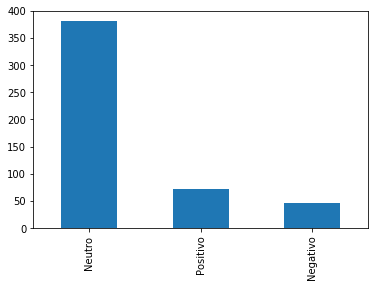

In [0]:
%matplotlib inline
manchetes.classificacao.value_counts().plot(kind='bar')


### Foi possível descobrir algo relevante sobre os dados a partir da análise de sentimentos?
  
Levando em consideração que a base fornecida para os testes era equilibrada como é possível verificar no comando abaixo:

In [0]:
manchetes.origem.value_counts()

Estado    129
Folha     127
Globo     126
Valor     118
Name: origem, dtype: int64

Parace não haver relações entre as origem das manchetes e as suas classificações como positivas ou negativas.

**Manchetes Positivas**

In [0]:
manchetes_positivas = manchetes[manchetes.classificacao == "Positivo"]
manchetes_positivas.head(n=5)

,dia,mes,ano,origem,manchete,classificacao
11,1,fevereiro,2017,Globo,BC prevê queda da inflação a 3%.,Positivo
13,1,fevereiro,2017,Globo,Crivella negocia Vila dos Atletas.,Positivo
17,1,fevereiro,2017,Folha,Operador diz que repatriou propina de Eike a C...,Positivo
22,1,fevereiro,2017,Estado,Financiamentos do BNDES têm maior queda em 22 ...,Positivo
24,1,fevereiro,2017,Estado,Desemprego atinge 12%.,Positivo


In [0]:
manchetes_positivas.origem.value_counts()

Estado    22
Globo     22
Valor     15
Folha     13
Name: origem, dtype: int64

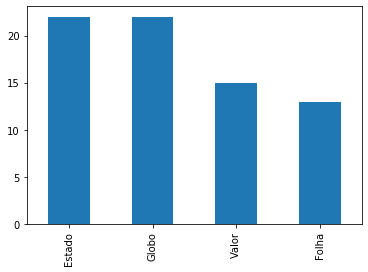

In [0]:
%matplotlib inline
manchetes_positivas.origem.value_counts().plot(kind='bar')

Levando em consideração os meses em que as noticias ocorreram, o mês de janeiro apresenta uma quantidade maior de noticias positivas.

In [0]:
manchetes_positivas.mes.value_counts()

janeiro      11
fevereiro    10
julho        10
março         9
junho         8
dezembro      7
maio          7
agosto        7
abril         3
Name: mes, dtype: int64

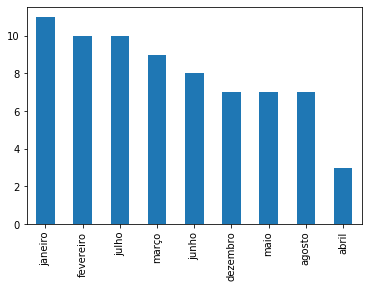

In [0]:
%matplotlib inline
manchetes_positivas.mes.value_counts().plot(kind='bar')

**Manchetes Negativas**

In [0]:
manchetes_negativas = manchetes[manchetes.classificacao == "Negativo"]
manchetes_negativas.head(n=5)

,dia,mes,ano,origem,manchete,classificacao
15,1,fevereiro,2017,Folha,Governo faz cortes após déficit recorde de R$ ...,Negativo
35,1,março,2017,Globo,Fé da Mangueira leva Estandarte.,Negativo
66,1,junho,2017,Globo,Joesley deu dinheiro a firma da qual filho de ...,Negativo
75,1,junho,2017,Folha,Governo prevê dívida fixa e fim de carência no...,Negativo
79,1,junho,2017,Estado,Ala do PSDB articula saída do governo antes de...,Negativo


In [0]:
manchetes_negativas.origem.value_counts()

Globo     14
Valor     12
Estado    11
Folha     10
Name: origem, dtype: int64

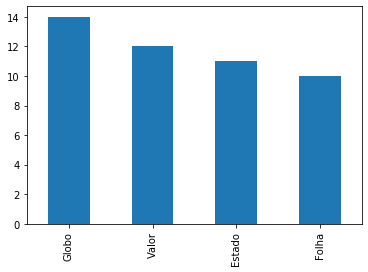

In [0]:
%matplotlib inline
manchetes_negativas.origem.value_counts().plot(kind='bar')

Levando em consideração os meses em que as noticias ocorreram, o mês de dezembro apresenta uma quantidade consideravelmente maior de noticias negativas.

In [0]:
manchetes_negativas.mes.value_counts()

dezembro     10
janeiro       7
julho         7
junho         6
maio          5
abril         4
fevereiro     3
agosto        3
março         2
Name: mes, dtype: int64

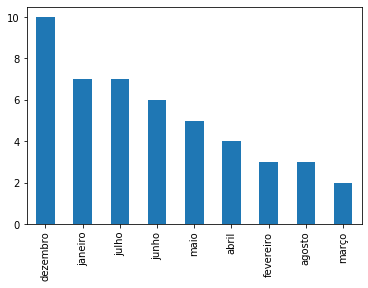

In [0]:
%matplotlib inline
manchetes_negativas.mes.value_counts().plot(kind='bar')

**Manchetes Neutras**

In [0]:
manchetes_neutras = manchetes[manchetes.classificacao == "Neutro"]
manchetes_neutras.head(n=5)

,dia,mes,ano,origem,manchete,classificacao
0,1,fevereiro,2017,Valor,BNDES encolhe e volta ao nível de 20 anos atrás,Neutro
1,1,fevereiro,2017,Valor,BC cria novo instrumento de política monetária.,Neutro
2,1,fevereiro,2017,Valor,Câmbio gera bate-boca entre UA e UE.,Neutro
3,1,fevereiro,2017,Valor,Indenização a transmissoras de energia já cheg...,Neutro
4,1,fevereiro,2017,Valor,"Políticos esperam que relator separe ""joio do ...",Neutro


In [0]:
manchetes_neutras.origem.value_counts()

Folha     104
Estado     96
Valor      91
Globo      90
Name: origem, dtype: int64

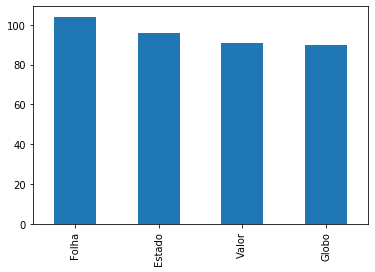

In [0]:
%matplotlib inline
manchetes_neutras.origem.value_counts().plot(kind='bar')

In [0]:
manchetes_neutras.mes.value_counts()

junho        52
dezembro     52
março        48
maio         44
fevereiro    42
abril        40
janeiro      38
julho        33
agosto       32
Name: mes, dtype: int64

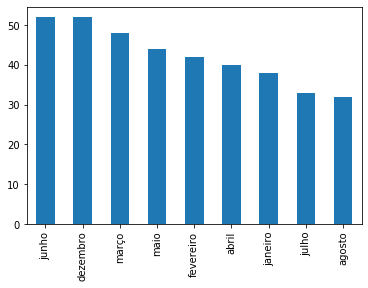

In [0]:
%matplotlib inline
manchetes_neutras.mes.value_counts().plot(kind='bar')

### Considerando que nenhum modelo é perfeito, quais são os pontos fracos do algoritmo implementado? Quais seriam pontos fortes?
  
O principal ponto fraco do modelo implementado é de que o mesmo classifica boa parte das manchetes como neutras.
É possível que pelo fato de as bases de treinamento e teste possuirem modos de escrita diferentes (formal/informal) e pela quantidade pequena de dados o modelo de classificação não têm parâmetros suficientes para rotular de maneira mais adequada a base de teste.

Os pontos positivos são a grande quantidade de material de referência disponível na internet para a consulta e que numa pesquisa mais extensa e aprofundada resultaria claramente em resultados melhores.


# Lições aprendidas

Com a execução desta tarefa, pude me aprofundar e ter uma introdução sobre diferentes áreas da computação, sendo elas a de aprendizagem de máquina e de processamento de linguagem natural. Pude aprofundar meus conhecimentos na linguagem de programação Python e sob a sua extensa lista de bibliotecas, a qual apesar de já ter tido um contato considerável com a mesma acadêmica e profissionalmente, não havia explorado ainda os temas apontados anteriormente.

Tenho certeza de que os conhecimentos aprendidos com a execução desta atividade certamente serão aplicados novamente no futuro em novas pesquisas na área de computação afetiva que tenho interesse em explorar.